[Back to course overview](../CourseOverviewR.ipynb)

# Basics on Visualisation 
* Author: Johannes Maucher
* Last Update: 2017-10-03

![Data Science R Overview](../../../Pics/DSRvisualize.PNG)

## Read Energy Data from .csv file

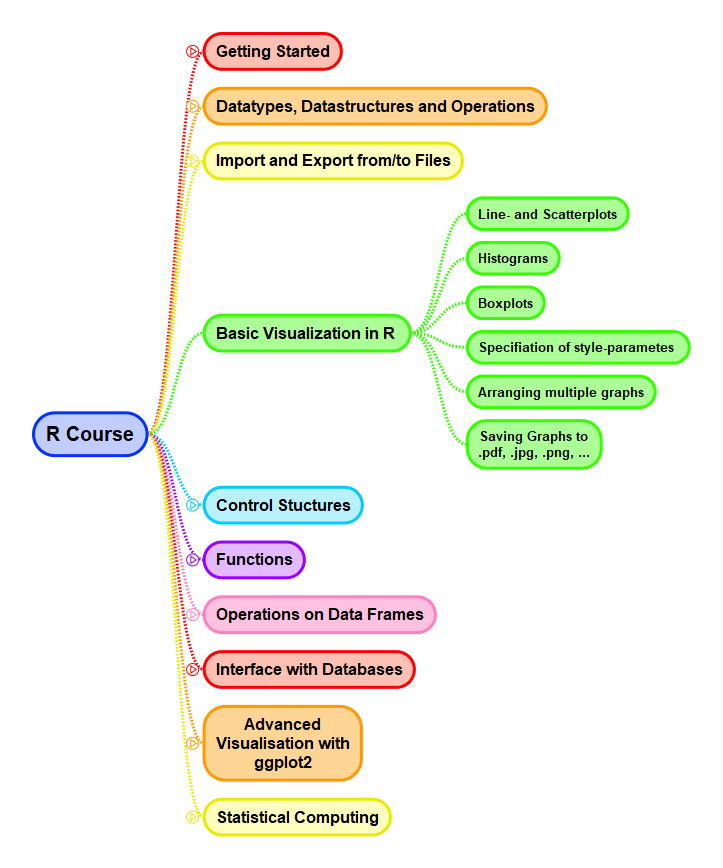

In [31]:
library("IRdisplay")
display_png(file="../../../Pics/DSRvisualize.PNG")

In [1]:
energyData=read.csv(file="../data/EnergyMixGeoClust.csv", header=TRUE, sep=",",row.names=1)

In [2]:
class(energyData)

[1] "data.frame"

In [3]:
print(energyData)

                Country   Oil   Gas   Coal Nuclear Hydro Total2009 CO2Emm
0                    US 842.9 588.7  498.0   190.2  62.2    2182.0 5941.9
1                Canada  97.0  85.2   26.5    20.3  90.2     319.2  602.7
2                Mexico  85.6  62.7    6.8     2.2   6.0     163.2  436.8
3             Argentina  22.3  38.8    1.1     1.8   9.2      73.3  164.2
4                Brazil 104.3  18.3   11.7     2.9  88.5     225.7  409.4
5                 Chile  15.4   3.0    4.1     0.0   5.6      28.1   70.3
6              Colombia   8.8   7.8    3.1     0.0   9.3      29.0   57.9
7               Ecuador   9.9   0.4    0.0     0.0   2.1      12.4   31.3
8                  Peru   8.5   3.1    0.5     0.0   4.5      16.6   35.5
9             Venezuela  27.4  26.8    0.0     0.0  19.5      73.6  147.0
10              Austria  13.0   8.4    2.3     0.0   8.3      32.0   68.8
11           Azerbaijan   2.8   6.9    0.0     0.0   0.5      10.2   24.8
12              Belarus   9.3  14.5   

## Simple Line- and Scatterplots
The function `plot(x,y)` opens a window and plots the values of `y` over the values of `x`. Optionally the arguments `xlab`, `ylab` and main can be assigned in order to specify the labels on the x- and y-axis and the title, respectively.

Simple linear regression is performed by the function `lm(x ~ y )`. The function returns the parameters *intercept* and *slope* of the line, which best fits to the data points, specified by their x- and y- coordinates.

The function `abline()` ([abline](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/abline.html)) adds a straight line to the plot. Here, the straight line is specified by the line-parameters (intercept and slope), which have been calculated by the linear regression function `lm`. 

[1] "lm"


Call:
lm(formula = energyData$CO2Emm ~ energyData$Total2009)

Coefficients:
         (Intercept)  energyData$Total2009  
              -43.13                  3.06  


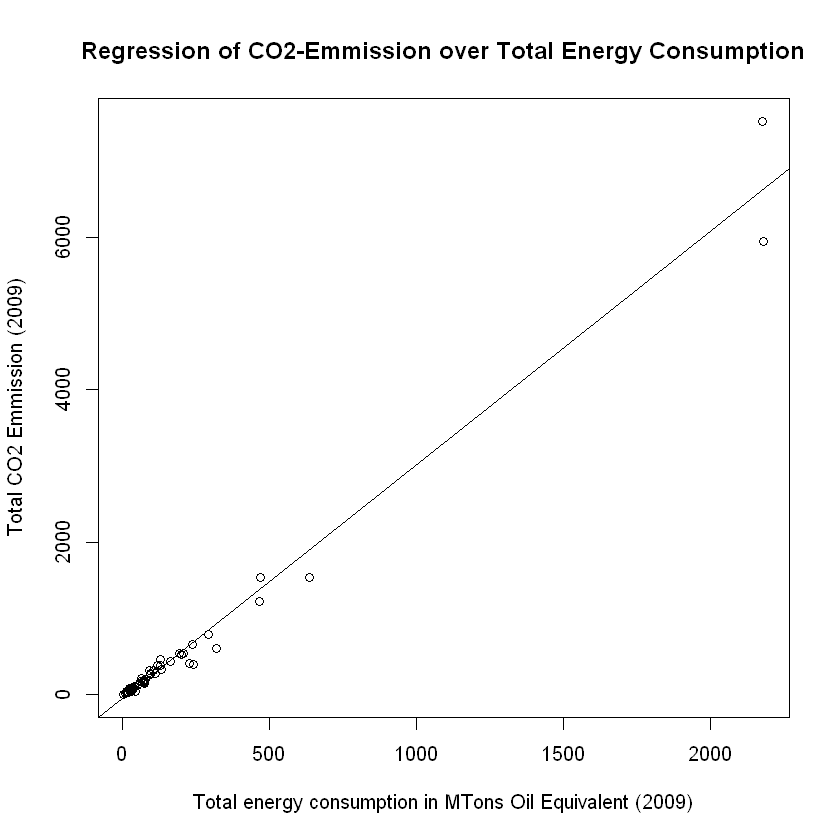

In [21]:
plot(energyData$Total2009,energyData$CO2Emm, 
     xlab = "Total energy consumption in MTons Oil Equivalent (2009)",
     ylab = "Total CO2 Emmission (2009)",
     main = "Regression of CO2-Emmission over Total Energy Consumption"
    )
regMod<-lm(energyData$CO2Emm~energyData$Total2009)
class(regMod)
regMod
abline(regMod)
#title("Regression of CO2-Emmission over Total Energy Consumption")

Questions:
1. How to ignore or remove the outliers in the plot?
2. How to access the parameters of the regression line?

In [22]:
print(energyData$CO2Emm)

 [1] 5941.9  602.7  436.8  164.2  409.4   70.3   57.9   31.3   35.5  147.0
[11]   68.8   24.8   62.9  172.8   43.7  109.5   50.3   52.5  398.7  795.6
[21]  100.4   53.6    3.5   40.1  434.8  209.2   15.3  265.1   39.9  320.4
[31]   62.7   83.7 1535.3   38.1  338.7   50.9   44.5  264.1   57.9  280.8
[41]  529.1  123.5  540.3   87.2   69.8  537.6  191.9  104.8  197.8  468.6
[51]  386.6   57.0 7518.5   78.5 1539.1  388.5 1222.1  148.0   36.2  160.4
[61]   71.3  180.2  663.3  320.3  274.4


## Value-dependent filtering of dataframe rows  
Create a subset of a dataframe, by value-filtering

In [23]:
redenergyData <- subset(x=energyData,subset=Total2009<1000,select=c(Total2009,CO2Emm))
print(redenergyData)

   Total2009 CO2Emm
1      319.2  602.7
2      163.2  436.8
3       73.3  164.2
4      225.7  409.4
5       28.1   70.3
6       29.0   57.9
7       12.4   31.3
8       16.6   35.5
9       73.6  147.0
10      32.0   68.8
11      10.2   24.8
12      23.9   62.9
13      69.4  172.8
14      17.4   43.7
15      39.6  109.5
16      16.1   50.3
17      25.0   52.5
18     241.9  398.7
19     289.8  795.6
20      32.7  100.4
21      22.4   53.6
22       3.9    3.5
23      13.9   40.1
24     163.4  434.8
25      64.4  209.2
26       8.2   15.3
27      93.3  265.1
28      42.5   39.9
29      92.3  320.4
30      22.3   62.7
31      34.6   83.7
32     635.3 1535.3
33      16.8   38.1
34     132.6  338.7
35      43.2   50.9
36      29.4   44.5
37      93.0  264.1
38      23.0   57.9
39     112.5  280.8
40     198.9  529.1
41      51.5  123.5
42     204.8  540.3
43      31.3   87.2
44      27.2   69.8
45     191.5  537.6
46      75.0  191.9
47      39.7  104.8
48      76.3  197.8
49     126.8  468.6


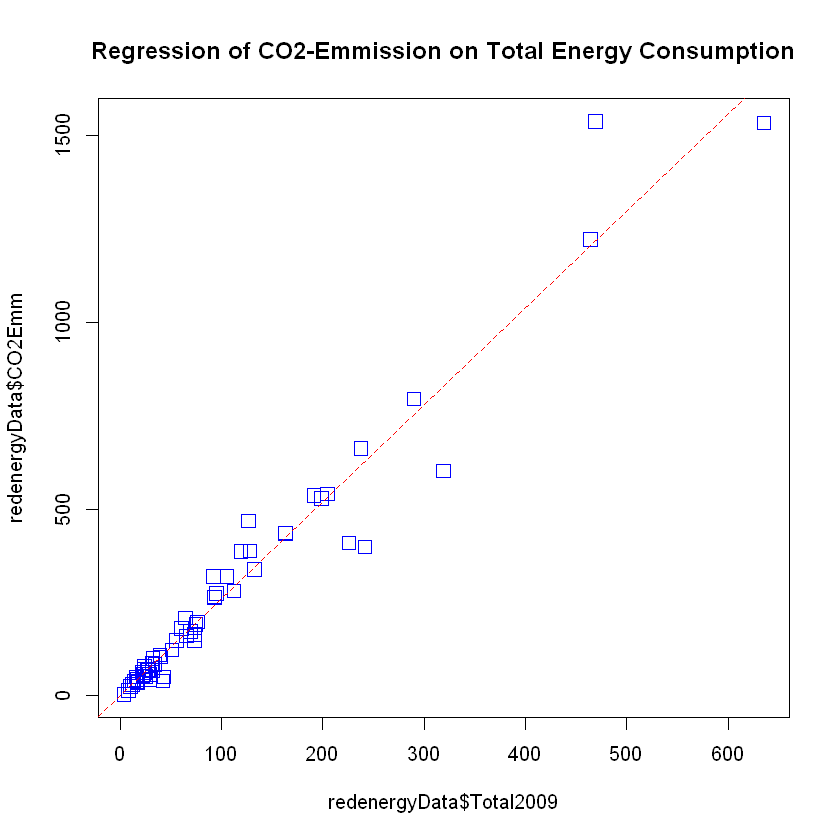

In [29]:
plot(redenergyData$Total2009,redenergyData$CO2Emm,cex=1.5,pch=0,col="blue")
abline(lm(redenergyData$CO2Emm~redenergyData$Total2009),col="red",lty=2)
title("Regression of CO2-Emmission on Total Energy Consumption")

Questions:
1. How to assign country names to markers in the plot?

## Save graph to pdf, png, jpg, ...
Save graph in to .pdf File

In [35]:
pdf("energygraph1.pdf")
    plot(redenergyData$Total2009,redenergyData$CO2Emm)
    abline(lm(redenergyData$CO2Emm~redenergyData$Total2009))
    title("Regression of CO2-Emmission on Total Energy Consumption")
dev.off()

png 
  2

The graph can also be saved in other formats, by using e.g. *png(), jpeg(), tiff(), postscript()* instead of *pdf()* 

## Histograms and Boxplots

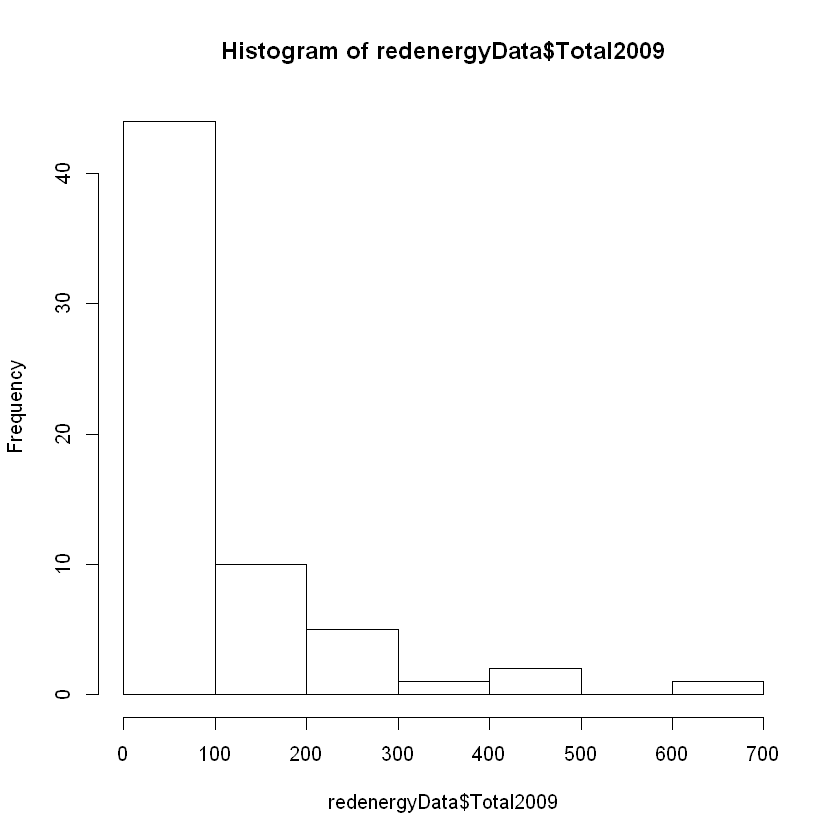

In [36]:
hist(redenergyData$Total2009)

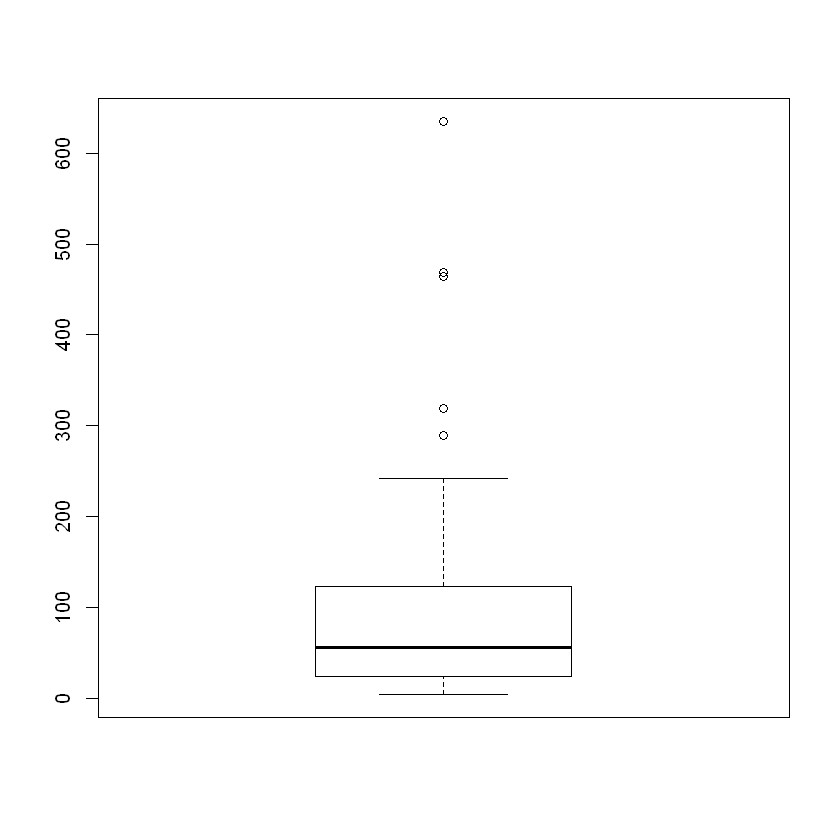

In [37]:
boxplot(redenergyData$Total2009)

Questions:
1. Interprete the boxplot
2. How to assign more data to the plots, e.g. units to axis, individual labels to axis, legends, ...?

## Specification of fonts, colors, line styles, axes, reference lines and annotations

In [38]:
year <- c(2010,2011,2012,2013,2014)
turnover <- c(2400000,3250000,2640000,4500000,4750000)
profit <- c(625000,789000,500000,810000,650000)

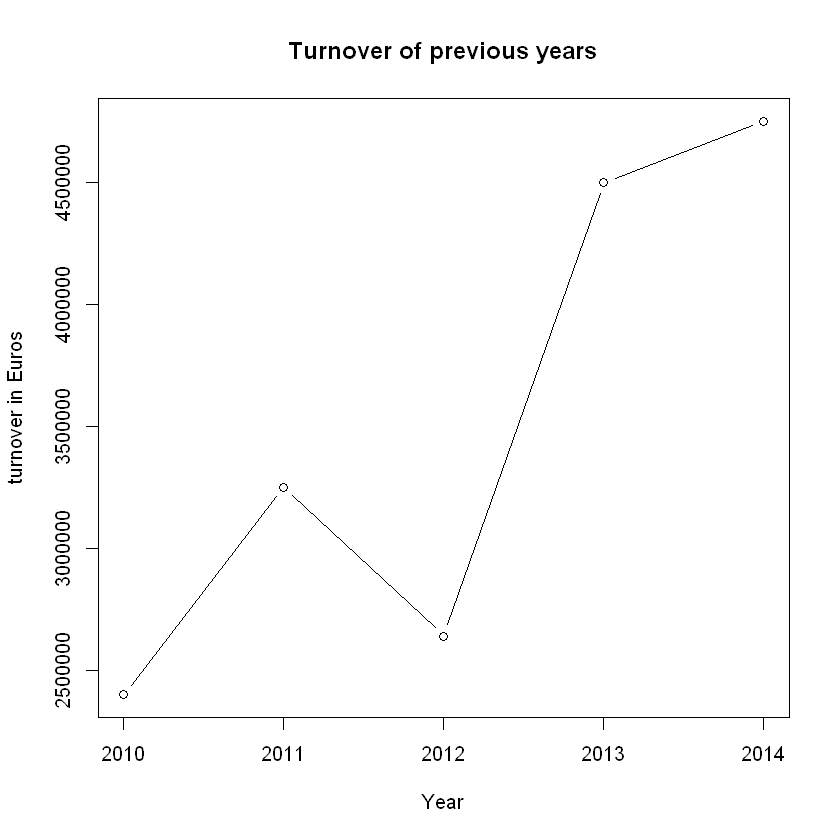

In [39]:
plot(year,turnover,type='b',ylab="turnover in Euros",xlab="Year",main="Turnover of previous years")

### Symbols and Lines

Parameter                |              Description
-----------------------  | -----------------------------
pch	                     | Specifies the symbol to use when plotting points
cex	                     | Specifies the symbol size. cex is a number indicating the amount by which plotting symbols should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so forth.
lty	                     | Specifies the line type
lwd	                     | Specifies the line width. lwd is expressed relative to the default (1 = default). For example, lwd=2 generates a line twice as wide as the default.

### Colors

| Parameter |                                                                                                                  Description                                                                                                                  |
|:---------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| col       | Default plotting color. Some functions (such as lines and pie) accept a vector of values that are recycled. For example, if col=c("red", "blue") and three lines are plotted, the first line will be red, the second blue, and the third red. |
| col.axis  | color for axis text                                                                                                                                                                                                                           |
| col.lab   | Color for axis labels                                                                                                                                                                                                                         |
| col.main  | Color for titles                                                                                                                                                                                                                              |
| col.sub   | Color for subtitles                                                                                                                                                                                                                           |
| fg        | Color for plot's foreground                                                                                                                                                                                                                   |
| bg        | Color for plot's background                                                                                                                                                                                                                   |

In R colors can be specified by 

* index (col=1)
* name (col="white")
* hexadecimal (col="#FFFFFF")
* RGB (col=rgb(1,1,1))
* HSV col=hsv(0,0,1)

All color names can be obtained as follows:

In [40]:
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

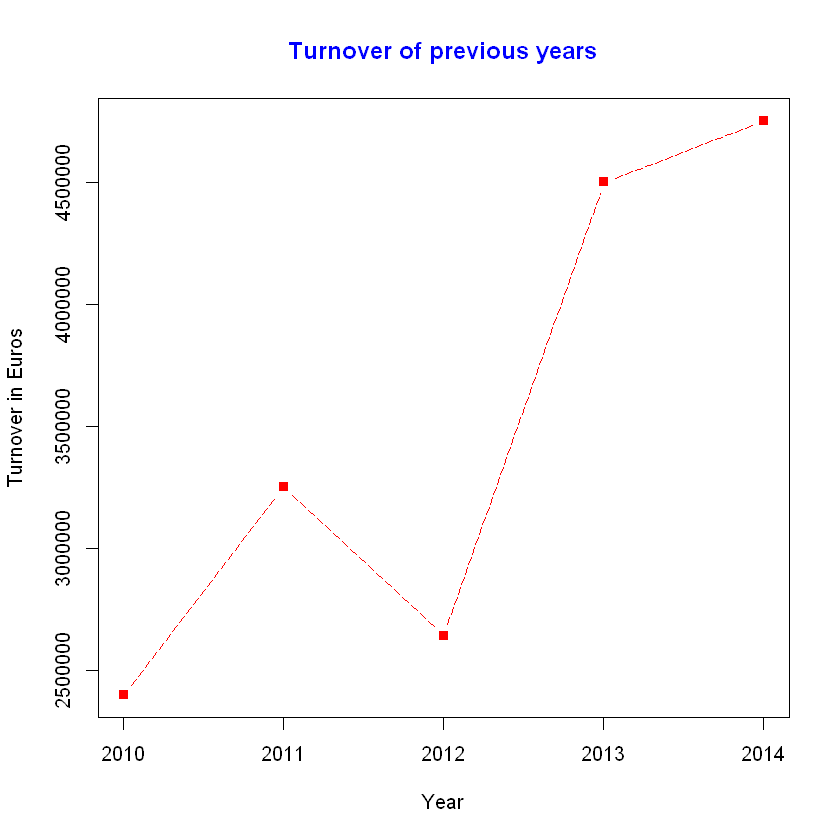

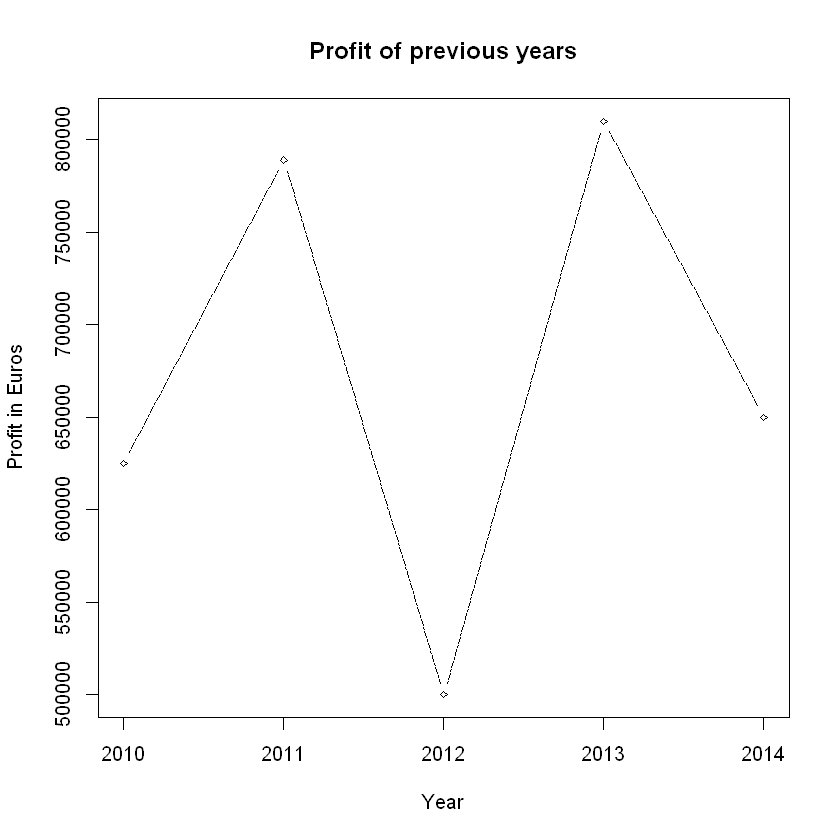

In [41]:
plot(year,turnover,type='b',ylab="Turnover in Euros",xlab="Year",main="Turnover of previous years",pch=15,lty=5,col='red',col.main="blue")
plot(year,profit,type='b',ylab="Profit in Euros",xlab="Year",main="Profit of previous years",pch=5,lty=6,cex=0.5)

Questions:
1. How to plot multiple graphs in one window?
2. How to surpress scientific number formatting?

#### Color schemes in R

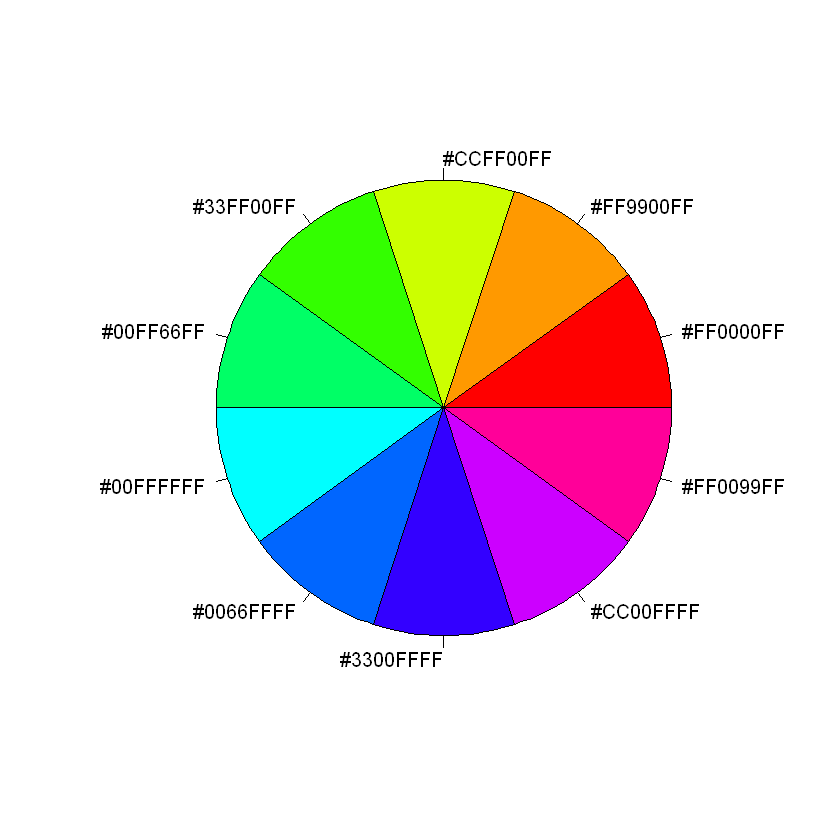

In [42]:
n <- 10
mycolors <- rainbow(n)
pie(rep(1, n), labels=mycolors, col=mycolors)

Instead of *rainbow()* other color schemes such as *heat.colors(), terrain.colors(), topo.colors(), cm.colors()* can be applied.

Different gray levels can be generated as follows: 

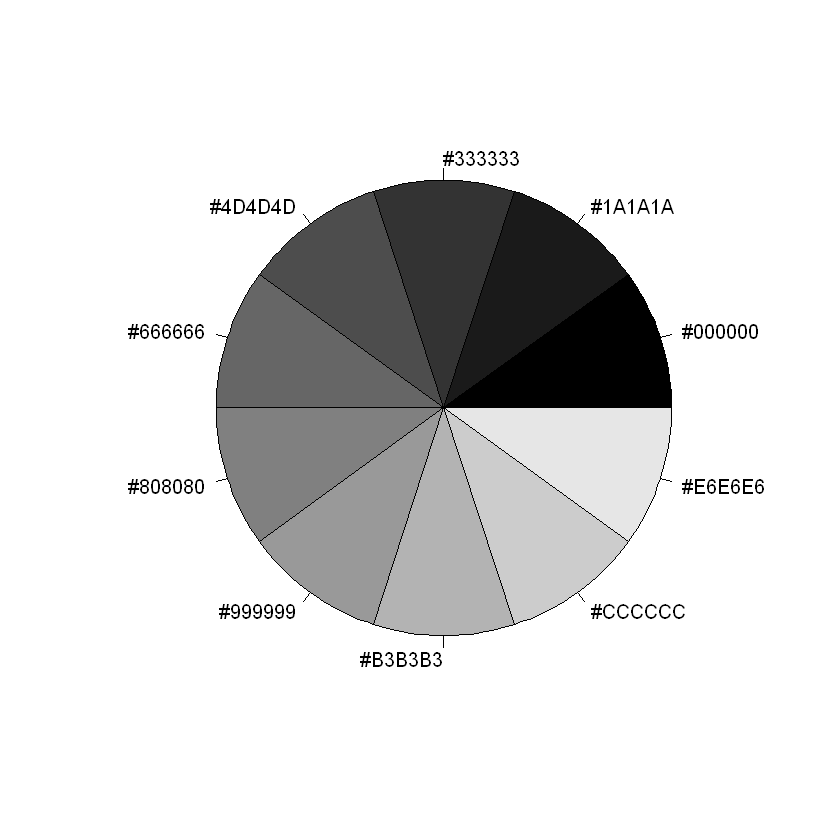

In [43]:
mygrays <- gray(0:n/n)
pie(rep(1, n), labels=mygrays, col=mygrays)

#### Create Color Palettes with RColorBrewer

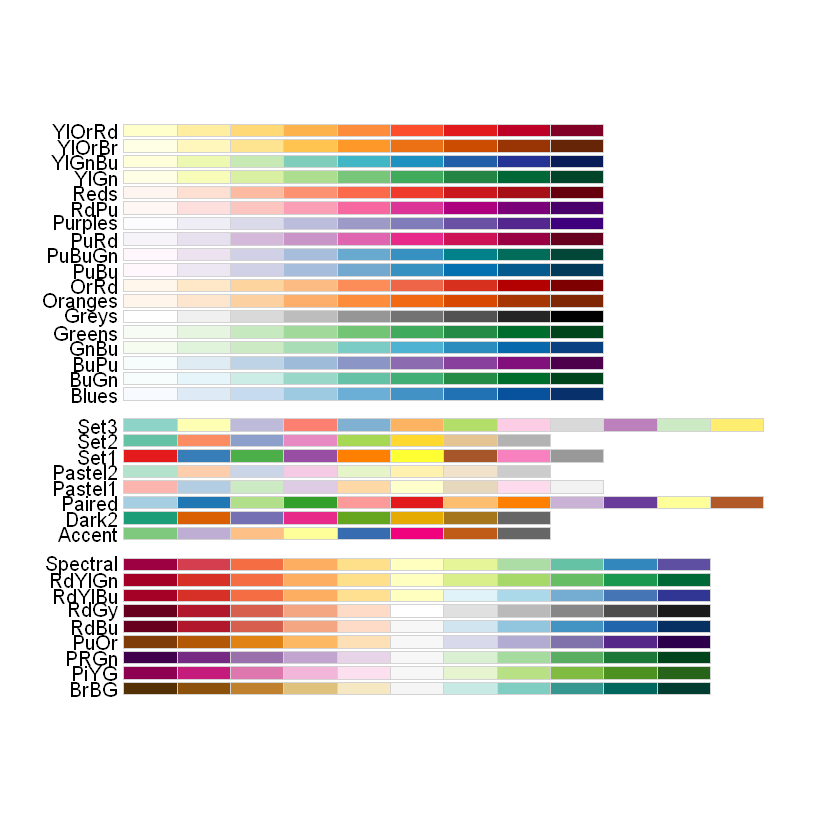

In [44]:
library(RColorBrewer)
display.brewer.all()

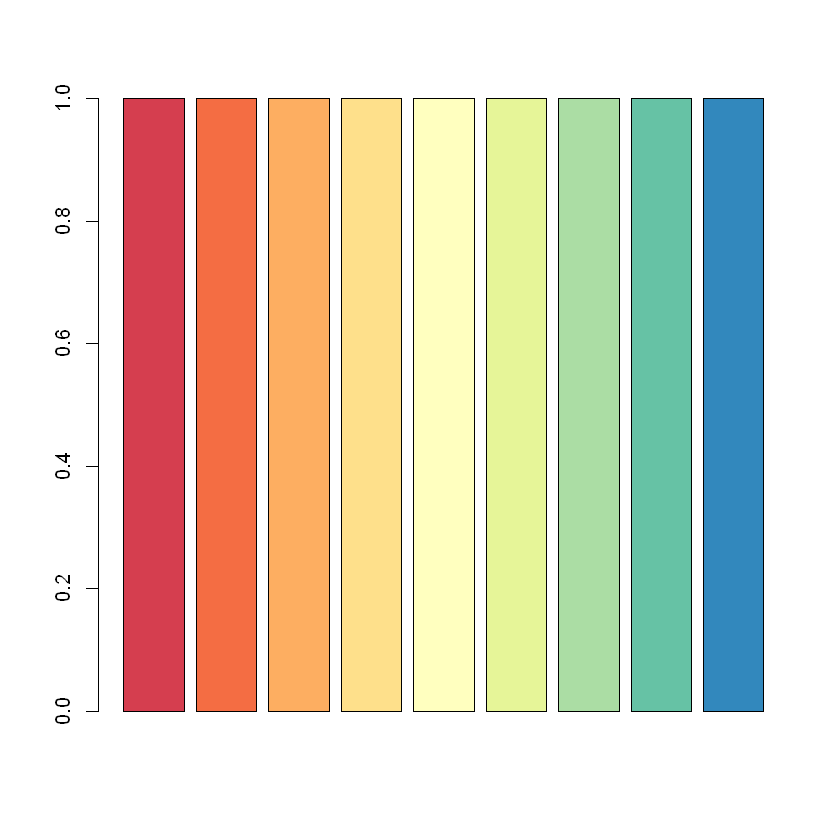

In [45]:
n <- 9
mycolors <- brewer.pal(n, "Spectral")
barplot(rep(1,n), col=mycolors)

### Text Parameters

| Parameter |                                                                         Description                                                                         |
|:---------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| cex       | Number indicating the amount by which plotted text should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so on. |
| cex.axis  | Size of axis text relative to cex                                                                                                                           |
| cex.lab   | Size of axis label text relative to cex                                                                                                                     |
| cex.main  | Size of titles relative to cex                                                                                                                              |
| cex.sub   | Size of subtitles relative to cex                                                                                                                           |

| Parameter |                                                                   Description                                                                   |
|:---------:|:-----------------------------------------------------------------------------------------------------------------------------------------------|
| font      | Integer specifying the font to use for plotted text. 1 = plain, 2 = bold, 3 = italic, 4 = bold italic, and 5=symbol (in Adobe symbol encoding). |
| font.axis | Font for axis text                                                                                                                              |
| font.lab  | Font for axis labels                                                                                                                            |
| font.main | Font for titles                                                                                                                                 |
| font.sub  | Font for subtitles                                                                                                                              |
| ps        | Font point size (roughly 1/72 inch). The text size = ps * cex                                                                                   |
| family    | Font family for drawing text. Standard values are serif, sans and mono.                                                                         |

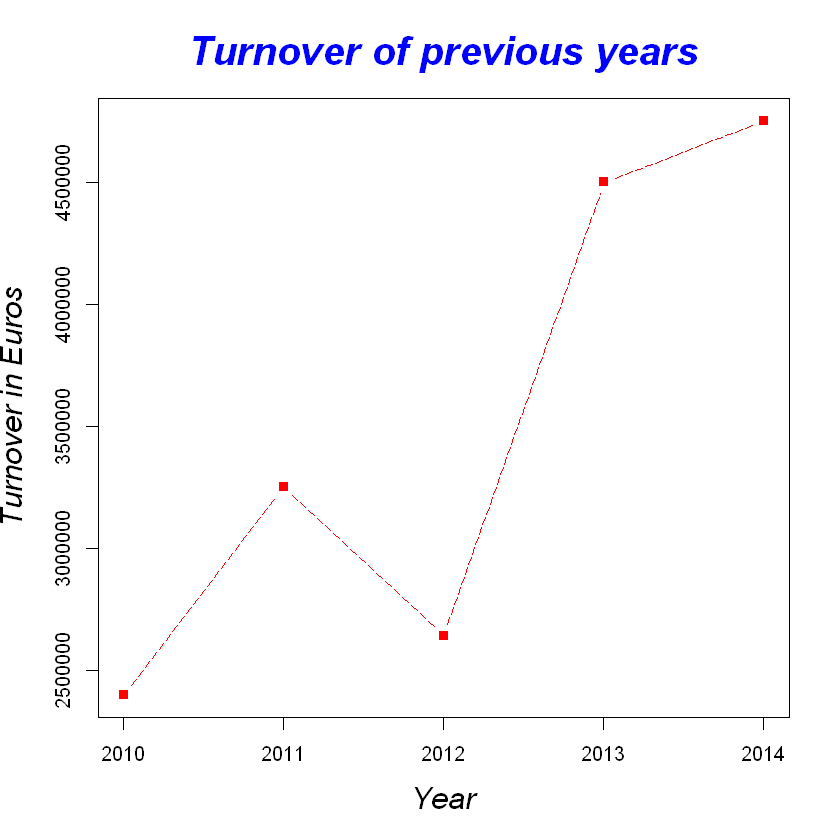

In [46]:
par(font.lab=3, cex.lab=1.5, font.main=4, cex.main=2)
plot(year,turnover,type='b',ylab="Turnover in Euros",xlab="Year",main="Turnover of previous years",pch=15,lty=5,col='red',col.main="blue")

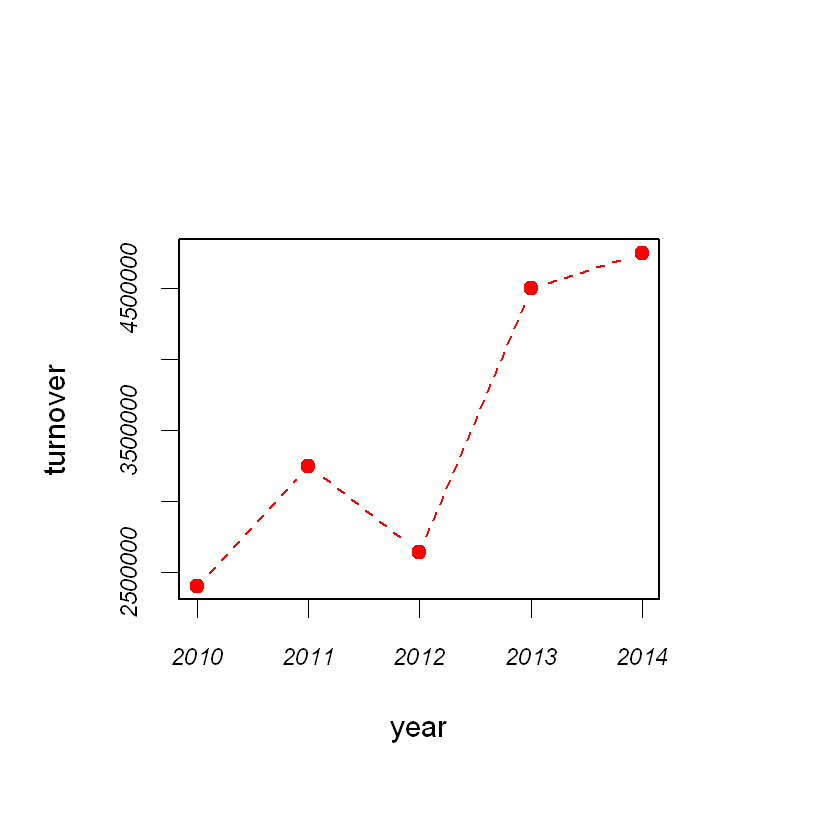

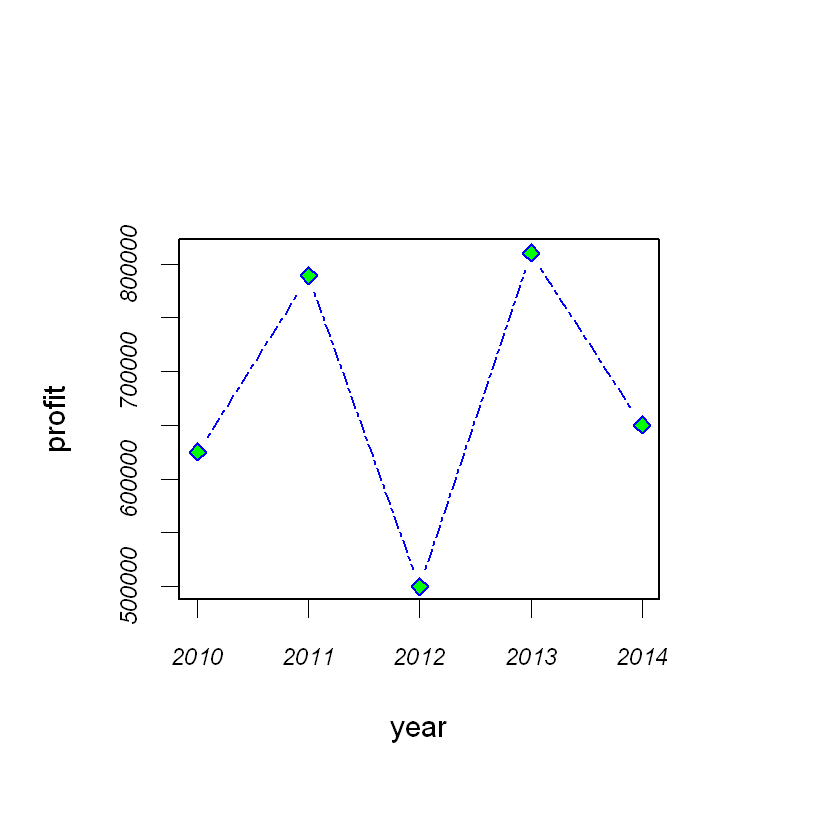

In [47]:
opar <- par(no.readonly=TRUE)
par(pin=c(4, 3))
par(lwd=2, cex=1.5)
par(cex.axis=.75, font.axis=3)
plot(year, turnover, type="b", pch=19, lty=2, col="red")
plot(year, profit, type="b", pch=23, lty=6, col="blue", bg="green")
par(opar)

## Multiple Graphs in one figure

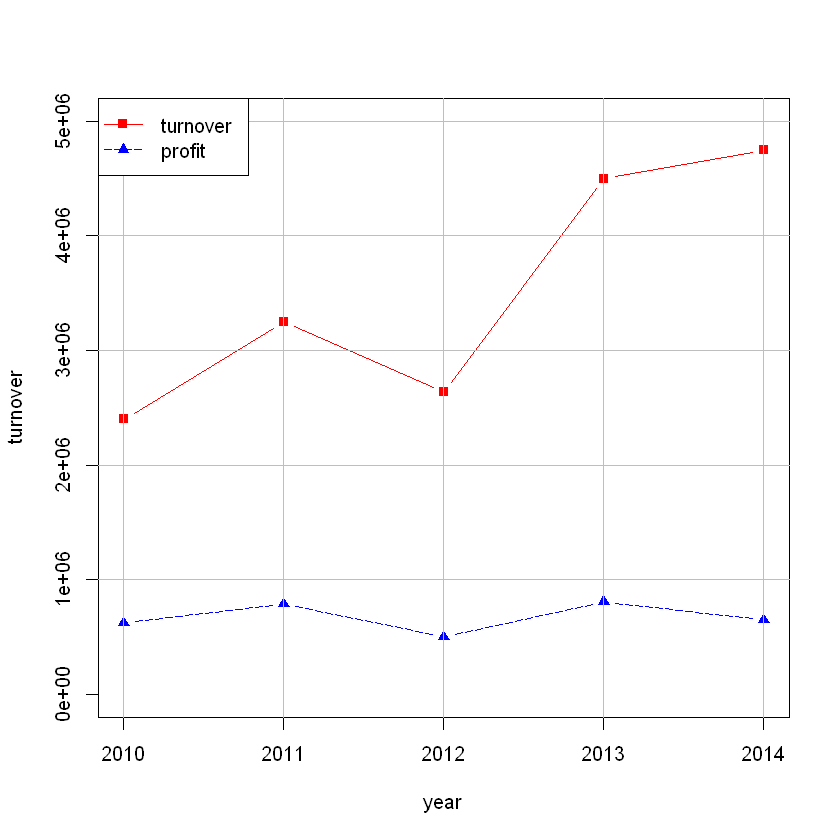

In [48]:
plot(year,turnover,type="b",pch=15,col="red",lty=1,ylim=c(0,5000000))
lines(year,profit,type="b",pch=17,lty=5,col="blue")
abline(h=1000000*(1:6),v=year,col="gray")
legend('topleft',c('turnover','profit'),pch=c(15,17),col=c("red","blue"),lty=c(1,5))

In [49]:
print(profit)

[1] 625000 789000 500000 810000 650000


In [50]:
print(turnover)

[1] 2400000 3250000 2640000 4500000 4750000


In [51]:
r=1000000*(1:6)

In [52]:
print(r)

[1] 1e+06 2e+06 3e+06 4e+06 5e+06 6e+06


## Arrange multiple figures in a matrix

In [53]:
redenergyData <- subset(x=energyData,subset=Total2009<1000)

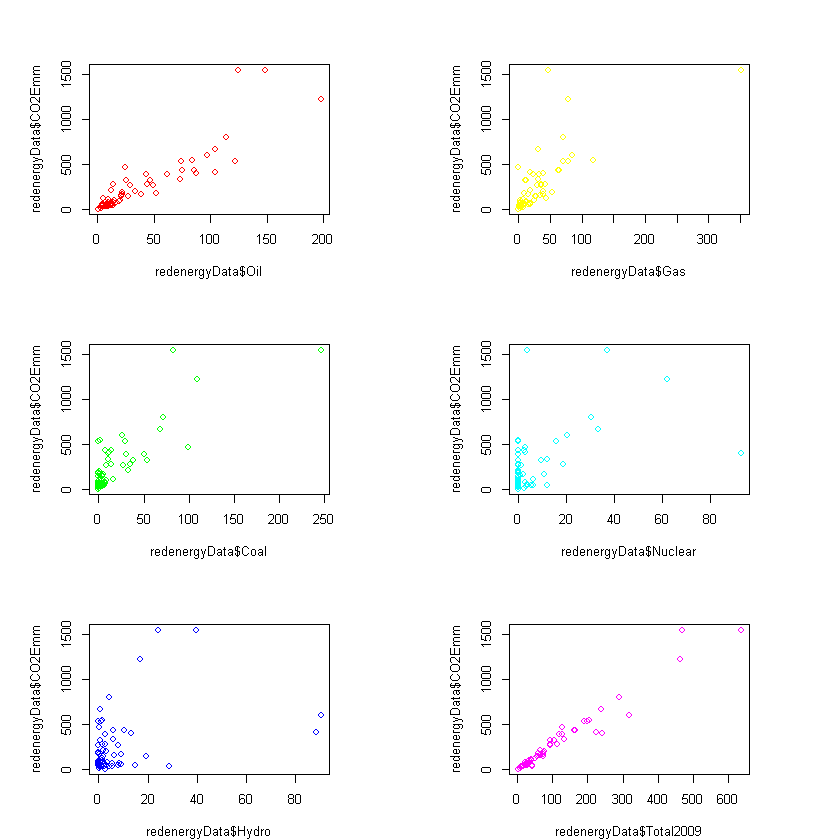

In [54]:
mycolors <- rainbow(6)
par(mfrow=(c(3,2)),pin=c(2, 1.25))
plot(redenergyData$Oil,redenergyData$CO2Emm,col=mycolors[1])
plot(redenergyData$Gas,redenergyData$CO2Emm,col=mycolors[2])
plot(redenergyData$Coal,redenergyData$CO2Emm,col=mycolors[3])
plot(redenergyData$Nuclear,redenergyData$CO2Emm,col=mycolors[4])
plot(redenergyData$Hydro,redenergyData$CO2Emm,col=mycolors[5])
plot(redenergyData$Total2009,redenergyData$CO2Emm,col=mycolors[6])